## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/updated/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,0.963,13.113760,15.517727,12.891271
1985-06,0.963,12.891271,15.517727,13.015066
1985-09,0.963,13.015066,15.517727,16.473642
1985-12,0.963,16.473642,15.517727,16.164600
1986-03,0.963,16.164600,15.517727,15.745636
1986-06,0.963,15.745636,15.517727,14.578185
1986-09,0.963,14.578185,15.517727,13.121224
1986-12,0.963,13.121224,15.517727,16.549911
1987-03,0.963,16.549911,15.517727,18.033113
1987-06,0.963,18.033113,15.517727,16.844805


In [ ]:
data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)

In [ ]:
data_traintest

In [ ]:
data_predict

In [ ]:
for stock in ['PEP','IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
    data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)
    data_traintest.to_csv(PATH+'{}_Manual_traintest_dataset.csv'.format(stock))
    data_predict.to_csv(PATH+'{}_Manual_predict_dataset.csv'.format(stock))

## 2.2 Scaled y dataset evaluation

In [12]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'bootstrap': True,
    'n_jobs': -1,
    'random_state': 2021
}
rf = GridSearchCV(RandomForestRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(best_params = param_tuner(data,rf,scaling=True))

{'max_depth': 4}


In [20]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'bootstrap': [True],
    'n_jobs': [-1],
    'random_state': [2021],
    'n_estimators': list(range(1,51)), #list(range(100,121)),
    'min_samples_leaf': [3], #list(range(1,21)),
    'max_features': ['auto'], #['auto', 'log2', 'sqrt', 1, 2, 3],
    'oob_score': [True], #[True, False],
    'max_depth': [None], #[1,2,3,4,5,None],
}
rf = GridSearchCV(RandomForestRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(rf, '{}_Manual_dataset.csv', PATH, stocks, 'rf', scaling=True)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 47, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on NSC 
RMSE mean: 5.152073448020988 
 MAPE mean: 0.11796243990589066 
 MAE mean: 3.227616103204762 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 16, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on GL 
RMSE mean: 5.19312846457205 
 MAPE mean: 0.12053015067505604 
 MAE mean: 3.302756126783927 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 17, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on PEP 
RMSE mean: 5.192490874214458 
 MAPE mean: 0.1201663240025447 
 MAE mean: 3.3079892254062613 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 21, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} Grid

In [24]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.3285067978509337	 std:0.13127702413830122


NSC
neg_root_mean_squared_error
	mean: 0.18458165902617582	 std:0.06767595316338051


GL
neg_mean_absolute_percentage_error
	mean: 0.3291454738707022	 std:0.203143778797168


GL
neg_root_mean_squared_error
	mean: 0.14092196810783875	 std:0.04307193025303331


PEP
neg_mean_absolute_percentage_error
	mean: 0.3526014022863243	 std:0.15997218123970247


PEP
neg_root_mean_squared_error
	mean: 0.140625263316177	 std:0.014912550503017149


BDX
neg_mean_absolute_percentage_error
	mean: 0.38293972154852884	 std:0.23669274077985897


BDX
neg_root_mean_squared_error
	mean: 0.11741993850412406	 std:0.02241642153878812


IBM
neg_mean_absolute_percentage_error
	mean: 0.3958878731136724	 std:0.27689064466739094


IBM
neg_root_mean_squared_error
	mean: 0.16196495678549855	 std:0.028120537567247146


MEAN MAPE: 0.35781625373403225
	 STD: 0.20159527392448431
MEAN RMSE: 0.14910275714796284
	 STD: 0.035239478605093

## 3.0 Model testing settings

In [3]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_traintest_dataset.csv', PATH)
datas_pred = make_dict('{}_Manual_predict_dataset.csv', PATH)

## 3.2 Random split - Scaled prediction variable

In [12]:
param_grid = {
    'bootstrap': [True],
    'n_jobs': [-1],
    'random_state': [2021],
    'n_estimators': [119], #list(range(100,121)),
    'min_samples_leaf': [3], #list(range(1,21)),
    'max_features': ['auto'], #['auto', 'log2', 'sqrt', 1, 2, 3],
    'oob_score': [True], #[True, False],
    'max_depth': [None], #[1,2,3,4,5,None],
}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'bootstrap': True, 'n_jobs': -1, 'random_state': 2021, 'n_estimators': 119, 'min_samples_leaf': 3, 'max_features': 'auto', 'oob_score': True, 'max_depth': None}


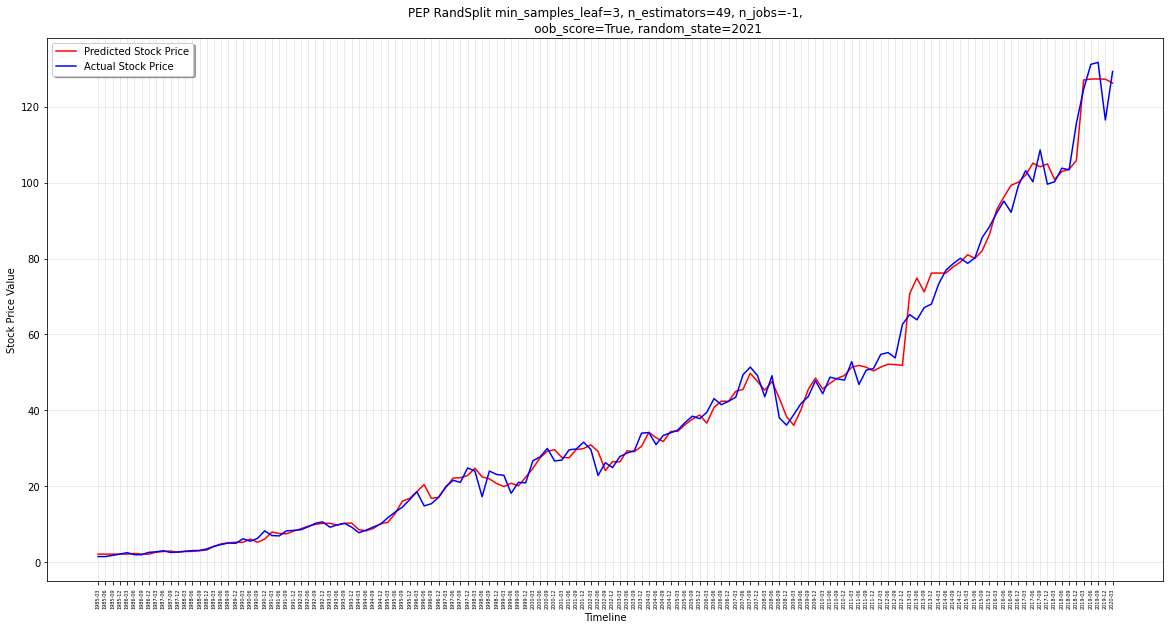

PEP MODEL RESULTS
 RMSE
 	Test: 4.263313772151756
 MAPE
 	Test: 0.10987893163984308
 MAE
 	Test: 2.7226388728855455
 R2 Score Adj
 	Test: 0.9802550899734318



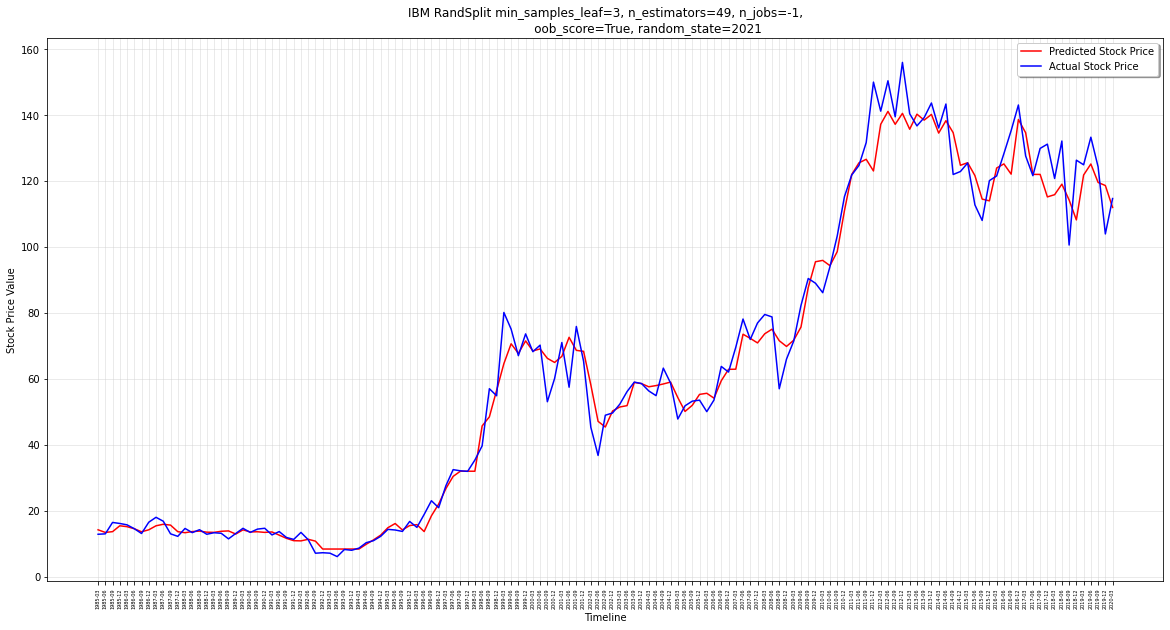

IBM MODEL RESULTS
 RMSE
 	Test: 9.23407088479573
 MAPE
 	Test: 0.12041806848835032
 MAE
 	Test: 6.153321526152528
 R2 Score Adj
 	Test: 0.9671697375250976



In [4]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False} #pre
Params={'bootstrap': True, 'n_jobs': -1, 'random_state': 2021, 'n_estimators': 49, 'min_samples_leaf': 3, 'max_features': 'auto', 'oob_score': True, 'max_depth': None}
rf = RandomForestRegressor(**Params)
models = dict()
for stock in ['PEP', 'IBM']:
    models[stock] = model_results_revised(datas[stock], rf, label=stock, scaling=True, end='2020-06')


PEP
              price  daily_difference  signal  positions
2020-09  136.529419         10.739572     1.0        NaN
2020-12  147.125229         -0.060780     0.0       -1.0
2021-03  141.449997          5.813876     1.0        1.0 

         stock
2020-09    1.0
2020-12    0.0
2021-03    1.0 

          positions        cash      total
2020-09  136.529419    3.470581  140.00000
2020-12    0.000000  150.595810  150.59581
2021-03  141.449997    9.145813  150.59581 



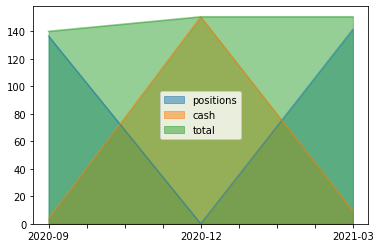


IBM
              price  daily_difference  signal  positions
2020-09  117.041725         16.783380     1.0        NaN
2020-12  122.847458         10.929893     1.0        0.0
2021-03  131.787506          1.783777     1.0        0.0 

         stock
2020-09    1.0
2020-12    1.0
2021-03    1.0 

          positions       cash       total
2020-09  117.041725  22.958275  140.000000
2020-12  122.847458  22.958275  145.805733
2021-03  131.787506  22.958275  154.745781 



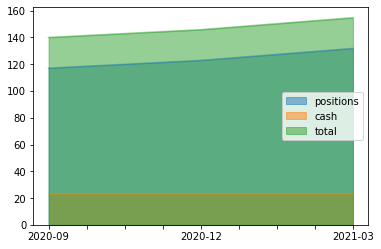

In [5]:
from lib.fundamental_lib import backtesting, generate_df
for stock in ['PEP', 'IBM']:
    print('\n'+stock)
    porto = backtesting(generate_df(datas_pred, stock, models, True), 140, verbose=True)
    #display(porto)
    porto.plot.area(stacked=False)
    plt.show()